https://code.earthengine.google.com/b455ba8cf4b5bee822bb7ff8935e6209

# Making True and False Color Images with Landsat data using Google Earth Engine
In this Jupyter Notebook, we first visualize true color images of the August Complex fire before and after it burned using a dataset from USGS with boundaries of wildfires. Then, the Normalized Burn Ratio (NBR) is used to analyze burn severity. To compare these two images, we will compute the Normalized Difference to show where burn severity most significantly affected the vegetation and soil.

BRIEF WALKTHROUGH OF WHAT WE DID

### Authors
- Guillermo Romero, Bren School of Environmental Science & Management, UCSB (romero61@ucsb.edu)
- Wade Sedgewick, Bren School of Environmental Science & Management, UCSB (wsedgwick@ucsb.edu)
- Hailey Veirs, Bren School of Environmental Science & Management, UCSB (hveirs@ucsb.edu)

### Table of Contents

1. [Purpose](#Purpose)
2. [Dataset Description](#Dataset_Description)
3. [Data I/O](#Data_I/O)
4. [Metadata Display](#Metadata_Display)
5. [True Color Visualization](#True_Color_Visualization)
6. [False Color Visualizations](#False_Color_Visualizations)
7. [Use Case Examples](#Use_Case_Examples)
8. [References](#References)

<a id='Purpose'></a>
### Notebook Purpose
Wildfires in California are becoming increasingly straining on the environment as well as the millions of people living in the state. As the world struggles to deal with climate change and droughts in the West, this issue must be addressed if California wants to avoid spending hundreds of millions of dollars on fire containment. To begin to understand how detrimental these wildfires can be, this notebook will analyze the burn areas of the August Complex fire that occurred from August 16th to November 12th 2020. An analysis will be shown of the Normalized Difference Burn Ratio (NDBR) as well as the rate at which the burn scars retreated and vegetation grew back. Sentinel 2 will be used to conduct this analysis.

Given this fire was just over 2 years ago, there has not been sufficient understanding into the before-after burn severity. The NDBR reveals where the fire experienced the most damage to the land and vegetation. This wildfire burned for a longer period of time than most other California wildfires, and as this happens more frequently with climate change, it is necessary to be informed on how severe fires will be in the future. 

We plan to analyze the August Complex Fire that burned in Northern California. This fire was the largest in California history, partially caused by a drought that started in the summer of 2020. It started from multiple lightning strikes that resulted in 13 separate fires that started on August 17th, 2020. Over the following week they quickly joined to form the August Fire, which lasted just under three months.

<a id='Dataset_Description'></a>
### Dataset Description
**Sentinel 2**

The dataset we will be using is the Sentinel 2 which was collected and organized by the Copernicus program, Europe’s Earth observation program. Sentinel 2 uses 2 separate satellites for increased temporal resolution. These satellites focus on terrestrial monitoring, whereas Sentinel 1 aims at capturing imagery of both marine and terrestrial areas. These satellites focus on monitoring coasts, vegetation and soil.

The dataset we will be using is the Landsat 8 collection 2 which was collected through a partnership between USGS and NASA. The collection 2 data has been upgraded from the collection 1 data; the most significant improvements are better geometric accuracy, which was achieved by working with the European Space Agency to improve ground control points (GCPs). The other significant improvement to the collection 2 data was improved elevation accuracy by using several localized digital elevation models. 


**Resolution & File Format**

The Sentinel 2 satellites collect 13 separate bands. Sentinel 2A was launched June, 2015 and Sentinel 2B was launched March, 2017. Sentinel 1A was the first Sentinel satellite to launch in April, 2014, while Sentinel 2B, which has since been decommissioned, was launched April, 2016. The Sentinel 2 comprises of two satellites that rotate the earth every 10 days, allowing an entire cycle to be completed in only five days. This increased temporal resolution is more than three times higher than Landsat 8. This is due to the focus on land and near-shore monitoring. The Sentinel satellites collect 13 separate bands: the visible bands have a resolution of 10 meters, five 20 meter and one 10 meter Visible and Near Infrared bands, two 60 meter and two 20 meter Shortwave Infrared bands, and one 60 meter Ultra Blue band (for coastal sediment and aerosols).

**File Format & Data Retrieval**

The data format for Sentinel 2 are ImageCollections, which are a collection of all images as individual bands taken by Sentinel 2A and 2B over their lifetimes. For our analysis, we used Google Earth Engine.

**Limitations** 

The Sentinel 2 has been in orbit for five and seven years, providing highly temporal and decently spatial resolution. However, there are some limitations in using the data. The most prominent is cloud coverage, which affects how much of the earth a satellite can record. Although trends can show where cloud coverage might be more difficult to work around, the randomness and frequency of clouds interfering with imagery collection can mean that researchers do not have access to satellite imagery at a certain date. Additionally, although 10 meters is an improvement to the 30-meter Landsat visible bands, this is still not at a resolution for spatially detailed analysis such as individual tree identification. 

#### Dataset Description: MTBS Polygon Data

We will also use the US Forest Service's Monitoring Trends in Burned Severity shapefiles to do our dNBR analysis with the Sentinel data. The file is a polygon file with several other saved variables such as the acerage of burned area, latitude longitude, ignition date, and dNBR values over certain thresholds. For this notebook, we will be using the polygon geometry to help subset our Sentinel data to the burned area, and we will compare our manual dNBR calculation with this dataset's dNBR calculation for the fire area. 

<a id='Data_I/O'></a>
### Data Input/Output

Import packages

In [5]:
#1) Import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import ee
import geemap

In [7]:
#ee.Authenticate()
ee.Initialize()

In [8]:
Map = geemap.Map(center=[39.9, -122.9], zoom=8.7)
Map

Map(center=[39.9, -122.9], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

Loading Monitoring Trends in Burn Severity (MTBS) Dataset
To load only the burned area of the fire, MTBS boundaries are loaded in, the August Complex fire is selected, and the other boundaries are removed

In [9]:
MTBS = ee.FeatureCollection("USFS/GTAC/MTBS/burned_area_boundaries/v1")
Map.addLayer(MTBS, {}, 'Boundaries')

In [10]:
aug_complex = MTBS.filter(ee.Filter.eq('Incid_Name', 'AUGUST COMPLEX'));

In [11]:
Map.addLayer(aug_complex, {}, "August Complex Boundary")
#Map.centerObject(selected_counties, zoom = 9);
Map.remove_ee_layer('Boundaries')

<a id='Metadata_Display'></a>
### Metadata Display

In [1]:
#august_complex.getInfo()
aug_complex.getInfo()
#BurnBndAc	INT	 Burn boundary acreage  1068802

In [44]:
#counties = ee.FeatureCollection("TIGER/2018/Counties")
#Map.addLayer(counties, {}, 'US Counties')

In [233]:
##### DRAW POLYGON TO SELECT COUNTIES!!! ####

In [45]:
#Map.draw_features

In [46]:
#roi = ee.FeatureCollection(Map.draw_features)
#selected_counties = counties.filterBounds(roi)
#Map.addLayer(selected_counties, {}, "Selected Counties")
#Map.centerObject(selected_counties, zoom = 8);

In [47]:
#august_complex = MTBS.filterBounds(roi)
#Map.addLayer(august_complex, {}, "August Complex Boundary")
#Map.centerObject(august_complex, zoom = 8);

In [48]:
#Map.remove_last_drawn()

#Map.remove_ee_layer('US Counties')
#Map.remove_ee_layer('August Complex Boundary')

In [283]:
#c_polygon = selected_counties.geometry().geometries().filter(ee.Filter.hasType('item','Polygon')); 

In [284]:
#geometry = ee.Geometry.MultiPolygon(c_polygon)                     
#geometry = ee.FeatureCollection(geometry)                                  


In [285]:
#geemap.ee_to_shp(geometry, filename='../downloads/selected_counties.shp')

<a id='True_Color_Visualization'></a>
### True Color Visualization

Create pre-fire and post-fire timeframes to filter to before and after the August Complex fire

In [10]:
# Start of fire August 16
#End of fire November 12
prefire_start = '2020-07-15';   
prefire_end = '2020-07-30';


postfire_start = '2020-11-13';
postfire_end = '2020-11-30';
imagery = ee.ImageCollection('COPERNICUS/S2')

prefireImCol = ee.ImageCollection(imagery.filterDate(prefire_start, prefire_end).filterBounds(aug_complex));
postfireImCol = ee.ImageCollection(imagery.filterDate(postfire_start, postfire_end).filterBounds(aug_complex));

In [11]:
# Function to mask clouds from the pixel quality band of Sentinel-2 SR data.
def  maskS2sr(image):
  # Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = ee.Number(2).pow(10).int();
    cirrusBitMask = ee.Number(2).pow(11).int();
  #Get the pixel QA band.
    qa = image.select('QA60');
  #All flags should be set to zero, indicating clear conditions.
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).bitwiseAnd(cirrusBitMask).eq(0);
  #Return the masked image, scaled to TOA reflectance, without the QA bands.
    return image.updateMask(mask).copyProperties(image, ["system:time_start"]);


Preparing pre-fire and post-fire Normalized Burn Ratio (NBR) images 

In [12]:
# Apply platform-specific cloud mask
prefire_CM_ImCol = prefireImCol.map(maskS2sr);
postfire_CM_ImCol = postfireImCol.map(maskS2sr);

In [13]:
pre_mos = prefireImCol.mosaic().clip(aug_complex);
post_mos = postfireImCol.mosaic().clip(aug_complex);

pre_cm_mos = prefire_CM_ImCol.mosaic().clip(aug_complex);
post_cm_mos = postfire_CM_ImCol.mosaic().clip(aug_complex);

In [14]:
preNBR = pre_cm_mos.normalizedDifference(['B8', 'B12']);
postNBR = post_cm_mos.normalizedDifference(['B8', 'B12']);

In [15]:
dNBR_unscaled = preNBR.subtract(postNBR);

#Scale product to USGS standards
dNBR = dNBR_unscaled.multiply(1000);

Set up parameters for true color images using band 2, 3, and 4 from the Sentinel satellites, and adding non-cloud masked pre-fire and post-fire images and cloud masked pre-fire and post-fire images

In [16]:
#visualization parameters for true color images
vis = {'bands': ['B4', 'B3', 'B2'], 'max': 2000, 'gamma': 1.5};
# Add the true color images to the map.
Map.addLayer(pre_mos, vis,'Pre-fire image');
Map.addLayer(post_mos, vis,'Post-fire image');

In [17]:
#Add the true color images to the map.
Map.addLayer(pre_cm_mos, vis,'Pre-fire True Color Image - Clouds masked');
Map.addLayer(post_cm_mos, vis,'Post-fire True Color Image - Clouds masked');

<a id='False_Color_Visualizations'></a>
### False Color Visualizations
Adding the pre-fire and post-fire cloud-masked NBRs in greyscale

In [18]:
#Burn Ratio Product - Greyscale
grey = ['white', 'black'];
#display pre- and post-fire NBR seperately
Map.addLayer(preNBR, {'min': -1, 'max': 1, 'palette': grey}, 'Prefire Normalized Burn Ratio');
Map.addLayer(postNBR, {'min': -1, 'max': 1, 'palette': grey}, 'Postfire Normalized Burn Ratio');

Map.addLayer(dNBR, {'min': -1000, 'max': 1000, 'palette': grey}, 'dNBR greyscale');


Creating an interactive map of pre-fire and post-fire NBRs

In [19]:
left_layer = geemap.ee_tile_layer(preNBR, {}, 'Prefire Normalized Burn Ratio')
right_layer = geemap.ee_tile_layer(postNBR, {}, 'Postfire Normalized Burn Ratio')

Map2 =  geemap.Map(center=[39.9, -122.9], zoom=8.7)
Map2.split_map(left_layer, right_layer)
Map2

Map(center=[39.9, -122.9], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_o…

In [20]:
#Define an SLD style of discrete intervals to apply to the image.
sld_intervals = '<RasterSymbolizer>' + '<ColorMap type="intervals" extended="false" >' + '<ColorMapEntry color="#ffffff" quantity="-500" label="-500"/>' + '<ColorMapEntry color="#7a8737" quantity="-250" label="-250" />' + '<ColorMapEntry color="#acbe4d" quantity="-100" label="-100" />' + '<ColorMapEntry color="#0ae042" quantity="100" label="100" />' + '<ColorMapEntry color="#fff70b" quantity="270" label="270" />' + '<ColorMapEntry color="#ffaf38" quantity="440" label="440" />' + '<ColorMapEntry color="#ff641b" quantity="660" label="660" />' + '<ColorMapEntry color="#a41fd6" quantity="2000" label="2000" />' + '</ColorMap>' + '</RasterSymbolizer>';

In [21]:
Map3 = geemap.Map(center=[39.9, -122.9], zoom=8.7)
Map3.add_basemap('SATELLITE')
Map3

Map(center=[39.9, -122.9], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

Adding Burn Severity map with levels of severity

In [22]:
Map3.addLayer(dNBR.sldStyle(sld_intervals), {}, 'dNBR classified');
#==========================================================================================
#                                   ADD A LEGEND

legend_dict = {
    "Enhanced Regrowth, High": '7a8737',
    'Enhanced Regrowth, Low':  'acbe4d',
    'Unburned': '0ae042',
    'Low Severity': 'fff70b',
    'Moderate-low Severity': 'ffaf38',
    'Moderate-high Severity': 'ff641b',
    'High Severity': 'a41fd6',
    'NA': 'ffffff'}


Map3.add_legend(legend_title = "dNBR Classes", legend_dict = legend_dict)

In [207]:
#dnbr_img = geemap.ee_to_numpy(dNBR, region = aug_complex)
#dnbr_img

array([[[ -49.05430222],
        [ -32.09242249]],

       [[-288.54684448],
        [ -97.1336441 ]]])

In [23]:
thresholds = ee.Image([-1000, -251, -101, 99, 269, 439, 659, 2000]);
classified = dNBR.lt(thresholds).reduce('sum').toInt();

In [24]:
#count number of pixels in entire layer
allpix =  classified.updateMask(classified); #mask the entire layer

In [25]:
pixstats = allpix.reduceRegion(
    reducer = ee.Reducer.count(),               # count pixels in a single class
    geometry = aug_complex.geometry(),
    scale = 30, 
    maxPixels = 10000000);

In [222]:
#zonal_dnbr = geemap.zonal_statistics(dNBR, aug_complex,  statistics_type='SUM')
#dnbr_stats = geemap.image_stats(classified, aug_complex)
#dnbr_stats.getInfo()

{'max': {'sum': None},
 'mean': {'sum': 0.7857142857142857},
 'min': {'sum': None},
 'std': {'sum': None},
 'sum': {'sum': 0.34509803921568627}}

In [210]:
#pixstatsr_img = geemap.ee_to_numpy(allpix, region = aug_complex)
#pixstatsr_img

Image.sampleRectangle: Fully masked pixels / pixels outside of the image footprint when sampling band 'sum' with no default value set. Note that calling sampleRectangle() on an image after ee.Image.clip() may result in a sampling bounding box outside the geometry passed to clip().


In [26]:
allpixels = ee.Number(pixstats.get('sum')); # extract pixel count as a number

In [27]:
#create an empty list to store area values in
arealist = [];

In [28]:
# create a function to derive extent of one burn severity class
#arguments are class number and class name
def areacount(cnr, name):
    singleMask =  classified.updateMask(classified.eq(cnr)); # mask a single class // count pixels in a single class
    stats = singleMask.reduceRegion(reducer = ee.Reducer.count(), geometry = aug_complex.geometry(), scale = 30, 
    maxPixels = 10000000);
    pix =  ee.Number(stats.get('sum'));
    hect = pix.multiply(900).divide(10000);               #Landsat pixel = 30m x 30m --> 900 sqm
    perc = pix.divide(allpixels).multiply(10000).round().divide(100);   # get area percent by class and round to 2 decimals
    arealist.append({'Class': name, 'Pixels': pix, 'Hectares': hect, 'Percentage': perc});

# severity classes in different order
names2 = ['NA', 'High Severity', 'Moderate-high Severity',
'Moderate-low Severity', 'Low Severity','Unburned', 'Enhanced Regrowth, Low', 'Enhanced Regrowth, High'];

In [30]:
i = 0
for i in range(len(names2)):
    if i < 8:
        areacount(i, names2[i])
        i + 1;

In [31]:
test = dNBR.id().getInfo()
test

In [2]:
NA = arealist[0:1].pop()

num = ee.Number.parse(NA.get('Hectares'));
#print(num)

NameError: name 'arealist' is not defined

In [33]:
High_Severity = arealist[0:2].pop()
High_Severity['Hectares']

In [34]:
plt.figure()
plt.plot(Hectares)

NameError: name 'Hectares' is not defined

<Figure size 640x480 with 0 Axes>

TypeError: float() argument must be a string or a real number, not 'dict'

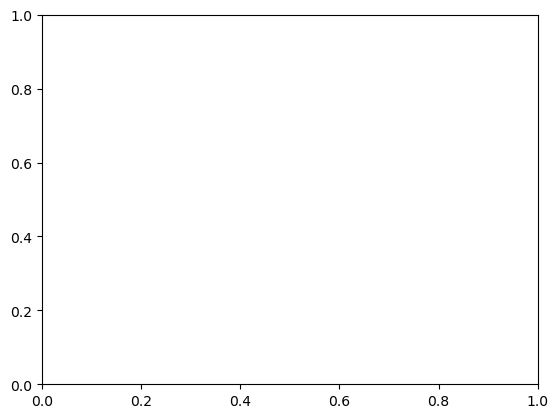

In [36]:
j = 0
for i in arealist:
    print(i)
    j+=1
    print(j)

{'Class': 'NA', 'Pixels': <ee.ee_number.Number object at 0x7f4985f59870>, 'Hectares': <ee.ee_number.Number object at 0x7f4985f5a830>, 'Percentage': <ee.ee_number.Number object at 0x7f4985f5b1f0>}
1
{'Class': 'High Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4985f5b430>, 'Hectares': <ee.ee_number.Number object at 0x7f4985f5a6e0>, 'Percentage': <ee.ee_number.Number object at 0x7f4985f5b130>}
2
{'Class': 'Moderate-high Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4986033c70>, 'Hectares': <ee.ee_number.Number object at 0x7f49860331c0>, 'Percentage': <ee.ee_number.Number object at 0x7f4986033fd0>}
3
{'Class': 'Moderate-low Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4985fa71f0>, 'Hectares': <ee.ee_number.Number object at 0x7f4985fa6e30>, 'Percentage': <ee.ee_number.Number object at 0x7f4985fa7910>}
4
{'Class': 'Low Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4985fa6b30>, 'Hectares': <ee.ee_number.Number object at 0x7f4985fa6830>, 'Percentage': 

In [37]:
print('Burned Area by Severity Class', arealist);

Burned Area by Severity Class [{'Class': 'NA', 'Pixels': <ee.ee_number.Number object at 0x7f4985f59870>, 'Hectares': <ee.ee_number.Number object at 0x7f4985f5a830>, 'Percentage': <ee.ee_number.Number object at 0x7f4985f5b1f0>}, {'Class': 'High Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4985f5b430>, 'Hectares': <ee.ee_number.Number object at 0x7f4985f5a6e0>, 'Percentage': <ee.ee_number.Number object at 0x7f4985f5b130>}, {'Class': 'Moderate-high Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4986033c70>, 'Hectares': <ee.ee_number.Number object at 0x7f49860331c0>, 'Percentage': <ee.ee_number.Number object at 0x7f4986033fd0>}, {'Class': 'Moderate-low Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4985fa71f0>, 'Hectares': <ee.ee_number.Number object at 0x7f4985fa6e30>, 'Percentage': <ee.ee_number.Number object at 0x7f4985fa7910>}, {'Class': 'Low Severity', 'Pixels': <ee.ee_number.Number object at 0x7f4985fa6b30>, 'Hectares': <ee.ee_number.Number object at 0x7f

### Discussion

Comparing the polygon file with our Sentinel calculations, the number of pixels classified High Severity do not match the number of dNBR values that meet the High Severity threshold in the MTBS polygon. 

### Future Analyses

With more time, the data extracted could be analyzed with other characteristics of the environment, such as slope, aspect, wind direction, and humidity. These analyses would better inform wildfire researchers the nature of fires, especially as the duration of this fire will increasingly resemble fires in the future.

<a id='references'></a> 
### References

- Sentinel data GEE page: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2 
- USFS MTBS Shapefile GEE page: https://developers.google.com/earth-engine/datasets/catalog/USFS_GTAC_MTBS_burned_area_boundaries_v1#description 
- MTBS Project Page: https://www.mtbs.gov/ 